In [4]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout
from tensorflow.keras.models import Model

In [6]:
labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt', 
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle Boot'
}

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255
print(f"X_Train Shape: {x_train.shape}")
print(f"X_Test Shape: {x_test.shape}")
print(f"Y_Train Shape: {y_train.shape}")
print(f"Y_Test Shape: {y_test.shape}")

4423680/4422102 [==============================] - 0s 0us/step
X_Train Shape: (60000, 28, 28)
X_Test Shape: (10000, 28, 28)
Y_Train Shape: (60000,)
Y_Test Shape: (10000,)


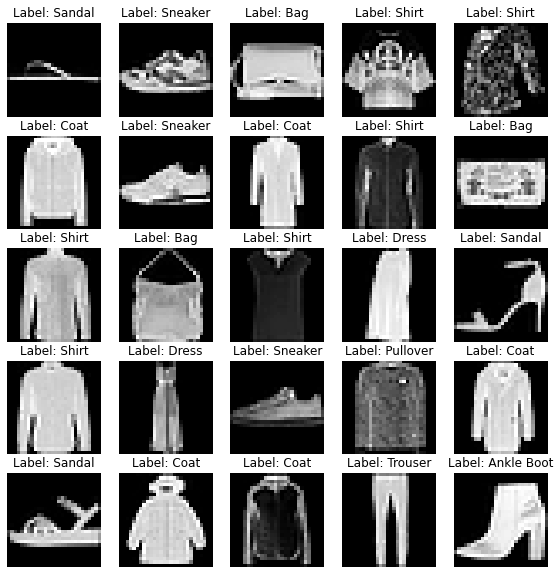

In [24]:
# Seeing some of the data
rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
axes = axes.ravel()
for i in np.arange(0, rows * cols):
    idx = np.random.randint(x_train.shape[0])
    axes[i].imshow(x_train[idx].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {labels[y_train[idx]]}")
    axes[i].axis('off')
    plt.subplots_adjust(wspace=0)

In [9]:
# convolution expects the image in 3d
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape

(60000, 28, 28, 1)

In [10]:
# find the number of classes
K = len(set(y_train))
print(f"The Number of classes: {K}")

The Number of classes: 10


In [11]:
# build the model using the function Keras API
def build_model():
  i = Input(shape=x_train[0].shape)
  x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
  x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
  x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
  x = Flatten()(x)
  x = Dropout(0.5)(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(K, activation='softmax')(x)
  return Model(i, x)

In [12]:
# get the model
model = build_model()

In [13]:
# compile the model
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# fit the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7815 - val_loss: 0.4072 - val_accuracy: 0.8476
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4157 - accuracy: 0.8451 - val_loss: 0.3638 - val_accuracy: 0.8660
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3659 - accuracy: 0.8651 - val_loss: 0.3391 - val_accuracy: 0.8738
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3380 - accuracy: 0.8735 - val_loss: 0.3195 - val_accuracy: 0.8805
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3141 - accuracy: 0.8827 - val_loss: 0.3201 - val_accuracy: 0.8787
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2996 - accuracy: 0.8888 - val_loss: 0.3062 - val_accuracy: 0.8883
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2841 - accuracy: 0.8946 - val_loss: 0.3049 - val_accuracy:

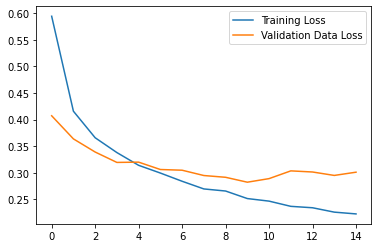

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Data Loss')
plt.legend()

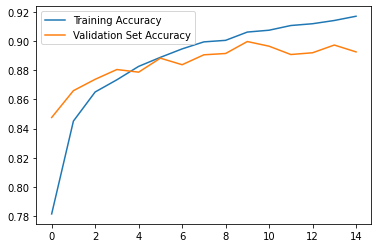

In [16]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Set Accuracy')
plt.legend()

In [17]:
p_test = model.predict(x_test).argmax(axis=1)

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(p_test, y_test)

In [19]:
import pandas as pd
import seaborn as sn
def plot_confusion_matrix(cm):
  df_cm = pd.DataFrame(cm, index=[labels[i] for i in range(K)], columns=[labels[i] for i in range(K)])
  plt.figure(figsize = (15, 10))
  sn.heatmap(df_cm, annot=True)

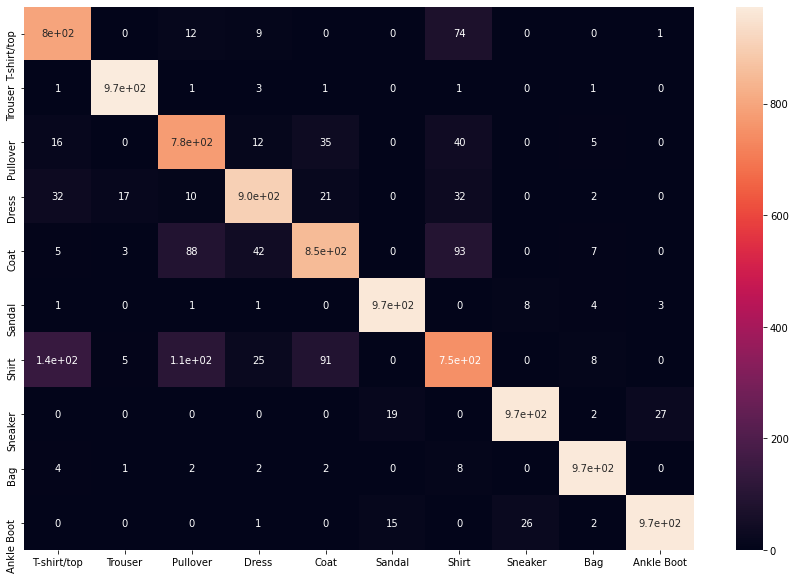

In [20]:
plot_confusion_matrix(cm)

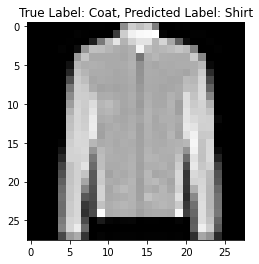

In [21]:
# Show some of the misclassified examples
misclassified_indices = np.where(p_test != y_test)[0]
idx = np.random.choice(misclassified_indices)
plt.title(f"True Label: {labels[y_test[idx]]}, Predicted Label: {labels[p_test[idx]]}")
plt.imshow(x_test[idx, :, :, :].reshape(28, 28), cmap='gray')